# Temat testów

### Czy istnieje istotna statystycznie różnica w poprawności odpowiedzi w zależności od czasu odpowiedzi?

In [1]:
import pandas as pd
import numpy as np

from functions.tests import conduct_logistic_regression_test
from functions.set_preparations import prepare_row
from functions.plots import create_roc_curve_and_residuals_plot, create_scatter_logit_plot, create_conditional_effects_plot

In [2]:
df_corr = pd.read_csv('/Users/martasolarz/Studies/Thesis/data/correctness.csv',
    usecols=['ID', '1a_corr', '1b_corr', '2a_corr', '2b_corr', '3a_corr', '3b_corr', 'Wynik']
)

df_corr = df_corr[df_corr.ID != 6] # odrzucony uczestnik ze względu na metryki eye trackingowe

a = df_corr[['1a_corr', '2a_corr', '3a_corr']]
b = df_corr[['1b_corr', '2b_corr', '3b_corr']]
df_corr['SumCorr_a'] = a.apply(lambda x: x.sum(), axis=1)
df_corr['SumCorr_b'] = b.apply(lambda x: x.sum(), axis=1)
gr1 = df_corr[['1a_corr', '1b_corr']]
gr2 = df_corr[['2a_corr', '2b_corr']]
gr3 = df_corr[['3a_corr', '3b_corr']]
df_corr['SumCorr_1'] = gr1.apply(lambda x: x.sum(), axis=1)
df_corr['SumCorr_2'] = gr2.apply(lambda x: x.sum(), axis=1)
df_corr['SumCorr_3'] = gr3.apply(lambda x: x.sum(), axis=1)

df_time =  pd.read_csv('/Users/martasolarz/Studies/Thesis/data/metrics/times.csv',
    usecols=['ID', 'Duration_1a', 'Duration_1b', 'Duration_2a', 'Duration_2b', 'Duration_3a', 'Duration_3b']
)

df_time['Sum_all'] = df_time.apply(lambda x: x.sum(), axis=1)
a = df_time[['Duration_1a', 'Duration_2a', 'Duration_3a']]
b = df_time[['Duration_1b', 'Duration_2b', 'Duration_3b']]
df_time['Sum_a'] = a.apply(lambda x: x.sum(), axis=1)
df_time['Sum_b'] = b.apply(lambda x: x.sum(), axis=1)
gr1 = df_time[['Duration_1a', 'Duration_1b']]
gr2 = df_time[['Duration_2a', 'Duration_2b']]
gr3 = df_time[['Duration_3a', 'Duration_3b']]
df_time['Sum_1'] = gr1.apply(lambda x: x.sum(), axis=1)
df_time['Sum_2'] = gr2.apply(lambda x: x.sum(), axis=1)
df_time['Sum_3'] = gr3.apply(lambda x: x.sum(), axis=1)

df_merge = df_corr.merge(df_time, on='ID')
df_merge.head()

,ID,Wynik,1a_corr,1b_corr,2a_corr,2b_corr,3a_corr,3b_corr,SumCorr_a,SumCorr_b,...,Duration_2a,Duration_2b,Duration_3a,Duration_3b,Sum_all,Sum_a,Sum_b,Sum_1,Sum_2,Sum_3
0,1,4,1,1,0,0,1,1,2,2,...,54481,58697,56314,63897,276921,138810,138110,43531,113178,120211
1,2,5,1,1,1,1,0,1,2,3,...,42248,85329,47948,129427,459647,156426,303219,154693,127577,177375
2,3,4,1,1,1,1,0,0,2,2,...,45165,32732,8000,61197,299890,121995,177892,152793,77897,69197
3,4,5,1,1,1,1,1,0,3,2,...,12449,37715,60980,101795,337437,119477,217956,124494,50164,162775
4,5,6,1,1,1,1,1,1,3,3,...,55931,22132,34898,62930,271458,158809,112644,95562,78063,97828


In [3]:
df_time.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,40.0,24.600,13.343201,1.0,14.75,24.5,35.50,46.0
Duration_1a,40.0,52403.675,18085.029493,28015.0,39714.50,52705.5,62955.50,117478.0
Duration_1b,40.0,50364.550,24844.453825,15516.0,30481.50,44781.0,66255.00,112511.0
Duration_2a,40.0,34225.000,23195.850356,8416.0,15745.00,27232.0,45294.00,98295.0
Duration_2b,40.0,55594.400,28714.159003,12066.0,33344.00,53205.5,71830.00,121461.0
Duration_3a,40.0,42925.775,22404.602238,8000.0,22594.75,39856.0,57476.50,100562.0
Duration_3b,40.0,80122.275,35611.747787,18282.0,56526.50,73571.0,105428.00,144209.0
Sum_all,40.0,315660.275,93454.841743,155010.0,246927.00,292472.0,387472.75,497887.0
Sum_a,40.0,129554.450,39260.116564,48881.0,99677.75,121128.0,151463.25,216222.0
Sum_b,40.0,186081.225,69731.776067,73413.0,136126.50,180049.5,225384.75,329950.0


Funkcje:

In [4]:
# def prepate_set(list_of_cols_czas, list_of_cols_popr):
#     new_row_czas = list_of_cols_czas[0]
#     for i in list_of_cols_czas[1:]:
#         new_row_czas = pd.concat([new_row_czas, i], ignore_index=True)
# 
#     new_row_popr = list_of_cols_popr[0]
#     for i in list_of_cols_popr[1:]:
#         new_row_popr = pd.concat([new_row_popr, i], ignore_index=True)
# 
#     return pd.DataFrame({'poprawnosc': new_row_popr, 'czas': new_row_czas, 'intercept': np.ones(len(new_row_popr))}) # intercept - specjalna kolumna dla regresji logistycznej

In [5]:
def create_plots(df):
    time = 'czas'
    corr = 'poprawnosc'
    create_scatter_logit_plot(df, time, corr, 'Czas [ms]', 'Poprawność')
    create_roc_curve_and_residuals_plot(df, time, corr, 'Czas [ms]')
    create_conditional_effects_plot(df, time, corr, 'Czas [ms]', 'Poprawność')

In [6]:
# def make_decision(p_val, alpha, H0, H1):
#     print('--------------------------------------------------------')
#     print('p-value: ', p_val)
#     if p_val < alpha:
#         print('Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1:')
#         print(H1)
#     else:
#         print('Brak podstaw do odrzucenia H0.')
#         print(H0)
#     print('--------------------------------------------------------')
# 
# def conduct_logistic_regression(df, h0, h1, alpha):
#     X = df[['intercept', 'czas']] # zmienne niezależne
#     y = df['poprawnosc'] # zmienna zależna
# 
#     # Tworzenie modelu regresji logistycznej
#     model = sm.Logit(y, X)
# 
#     # Dopasowanie modelu
#     result = model.fit()
# 
#     make_decision(result.pvalues['czas'], alpha, h0, h1)
#     print(result.summary())

In [7]:
# def create_plots(df):
#     # Tworzenie wykresu punktowego
#     plt.scatter(df['czas'], df['poprawnosc'])
#     plt.xlabel('Czas [ms]')
#     plt.ylabel('Poprawność')
#     plt.title('Wykres poprawności w zależności od czasu')
#     plt.grid()
#     plt.show()
# 
#     # Tworzenie wykresu krzywej ROC
#     logit_model = sm.Logit(df['poprawnosc'], sm.add_constant(df['czas']))
#     result = logit_model.fit(disp=0)
#     y_pred = result.predict(sm.add_constant(df['czas']))
#     fpr, tpr, _ = roc_curve(df['poprawnosc'], y_pred)
#     plt.plot([0, 1], [0, 1], color='r', linestyle='--')
#     plt.plot(fpr, tpr, marker='.')
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Wykres krzywej ROC')
#     plt.grid()
#     plt.show()
#     
#     # Tworzenie wykresu reszt
#     y_pred_binary = (y_pred > 0.5).astype(int)
#     residuals = df['poprawnosc'] - y_pred_binary
#     plt.scatter(df['czas'], residuals)
#     plt.axhline(y=0, color='r', linestyle='-')
#     plt.xlabel('Czas [ms]')
#     plt.ylabel('Reszty')
#     plt.title('Wykres reszt')
#     plt.grid()
#     plt.show()
# 
#     # Wykresy warunkowych efektów
#     sns.lmplot(x='czas', y='poprawnosc', data=df, logistic=True, y_jitter=.03)
#     plt.title('Wykres warunkowych efektów')
#     plt.xlabel('Czas [ms]')
#     plt.ylabel('Poprawność')
#     plt.grid()
#     plt.show()

**H0:** Nie ma istotnej statystycznie zależności między poprawnością odpowiedzi a czasem odpowiedzi.

**H1:** Istnieje istotna statystycznie zależność między poprawnością odpowiedzi a czasem odpowiedzi.

**Poziom istotności:** $\alpha=0.05$

Mamy do czynienia ze zmienną zależną dyskretną (poprawność) i niezależną ciągłą (czas), zatem stosujemy regresję logistyczną.

In [8]:
ALPHA = 0.05

#### Wynik ogólny vs. czas całościowo

In [9]:
df_merge['intercept'] = np.ones(len(df_merge))
conduct_logistic_regression_test(df_merge, 'Wynik', ['intercept', 'Sum_all'], ALPHA)

Optimization terminated successfully.
         Current function value: 0.550585
         Iterations 5
SUM_ALL:
p-value: 0.996984970923363
Brak podstaw do odrzucenia H0.
                           Logit Regression Results                           
Dep. Variable:                  Wynik   No. Observations:                   40
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                 -0.2986
Time:                        22:23:41   Log-Likelihood:                -22.023
converged:                       True   LL-Null:                       -16.960
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.8717      1.235      0.7

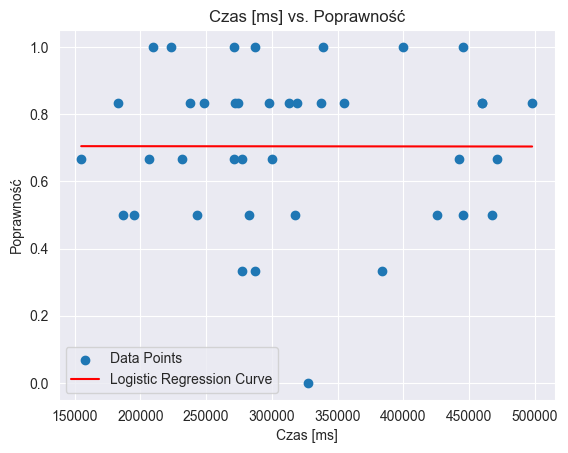

In [10]:
create_scatter_logit_plot(df_merge, 'Sum_all', 'Wynik', 'Czas [ms]', 'Poprawność')

#### Wszystkie grafiki - zagregowane w jednej kolumnie

In [11]:
popr = []
for col in df_merge.columns.tolist():
    if col.endswith('corr'):
        popr.append(df_merge[col])

czas = []
for col in df_merge.columns.tolist():
    if col.startswith('Duration'):
        czas.append(df_merge[col])
        
czas_row = prepare_row(czas)
popr_row = prepare_row(popr)

df = pd.DataFrame({'poprawnosc': popr_row, 'czas': czas_row, 'intercept': np.ones(len(czas_row))})

conduct_logistic_regression_test(df, 'poprawnosc', ['intercept', 'czas'], ALPHA)

Optimization terminated successfully.
         Current function value: 0.604885
         Iterations 5
CZAS:
p-value: 0.28016079777004455
Brak podstaw do odrzucenia H0.
                           Logit Regression Results                           
Dep. Variable:             poprawnosc   No. Observations:                  240
Model:                          Logit   Df Residuals:                      238
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                0.003965
Time:                        22:23:43   Log-Likelihood:                -145.17
converged:                       True   LL-Null:                       -145.75
Covariance Type:            nonrobust   LLR p-value:                    0.2824
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1402      0.293      3.88

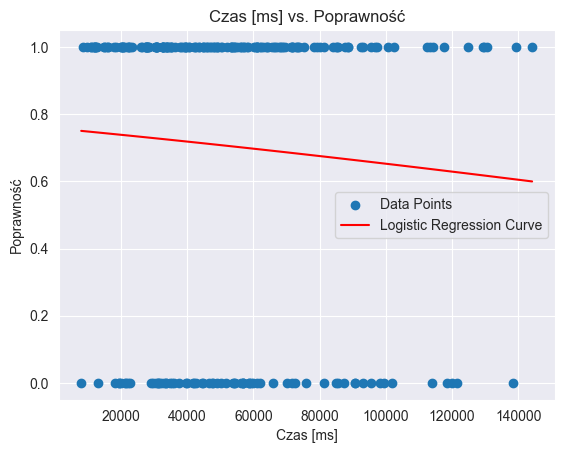

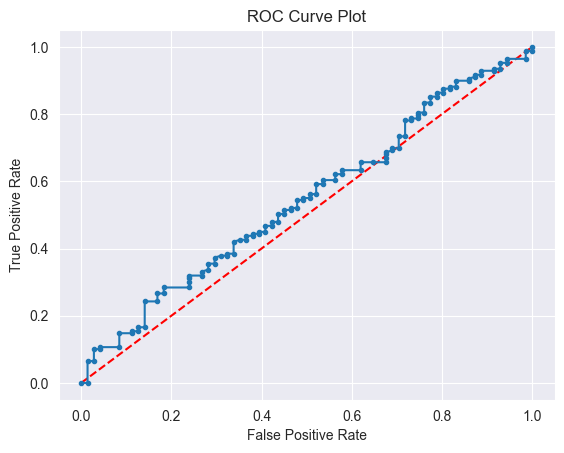

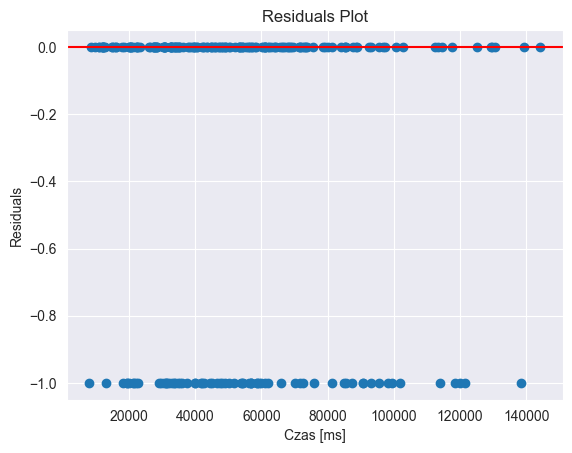

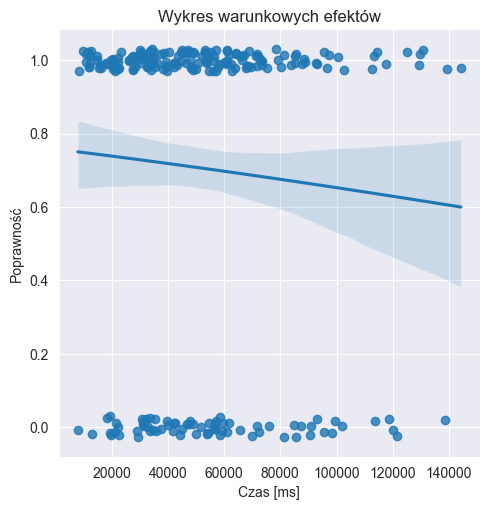

In [12]:
create_plots(df)

#### Zsumowane wyniki dla grafik A

In [13]:
df_merge['intercept'] = np.ones(len(df_merge))
conduct_logistic_regression_test(df_merge, 'SumCorr_a', ['intercept', 'Sum_a'], ALPHA)

Optimization terminated successfully.
         Current function value: 0.536395
         Iterations 5
SUM_A:
p-value: 0.2767955957513475
Brak podstaw do odrzucenia H0.
                           Logit Regression Results                           
Dep. Variable:              SumCorr_a   No. Observations:                   40
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                 -0.1239
Time:                        22:23:46   Log-Likelihood:                -21.456
converged:                       True   LL-Null:                       -19.090
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.1917      1.273      1.72

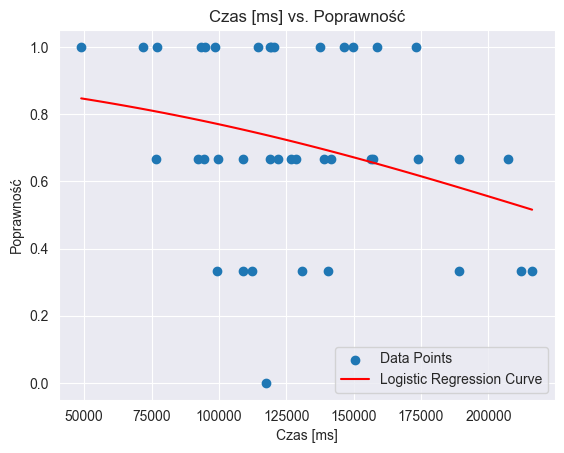

In [14]:
create_scatter_logit_plot(df_merge, 'Sum_a', 'SumCorr_a', 'Czas [ms]', 'Poprawność')

### Grafiki A - zagregowane do jednej kolumny

In [15]:
popr = []
for col in df_merge.columns.tolist():
    if col.endswith('a_corr'):
        popr.append(df_merge[col])

czas = []
for col in df_merge.columns.tolist():
    if col.startswith('Duration') and col.endswith('a'):
        czas.append(df_merge[col])

czas_row = prepare_row(czas)
popr_row = prepare_row(popr)

df = pd.DataFrame({'poprawnosc': popr_row, 'czas': czas_row, 'intercept': np.ones(len(czas_row))})

conduct_logistic_regression_test(df, 'poprawnosc', ['intercept', 'czas'], ALPHA)

Optimization terminated successfully.
         Current function value: 0.601730
         Iterations 5
CZAS:
p-value: 0.497459020898542
Brak podstaw do odrzucenia H0.
                           Logit Regression Results                           
Dep. Variable:             poprawnosc   No. Observations:                  120
Model:                          Logit   Df Residuals:                      118
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                0.003160
Time:                        22:23:48   Log-Likelihood:                -72.208
converged:                       True   LL-Null:                       -72.436
Covariance Type:            nonrobust   LLR p-value:                    0.4986
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1513      0.443      2.600 

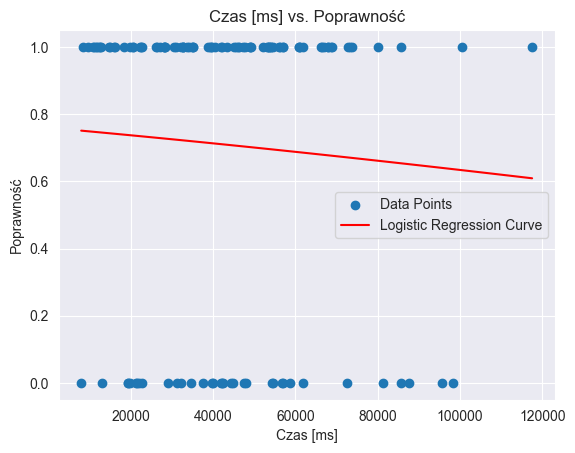

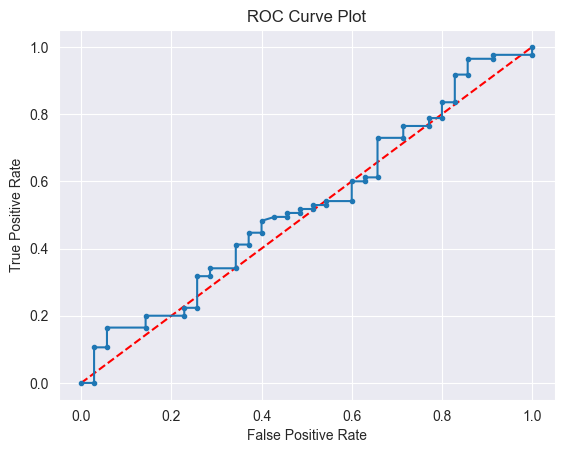

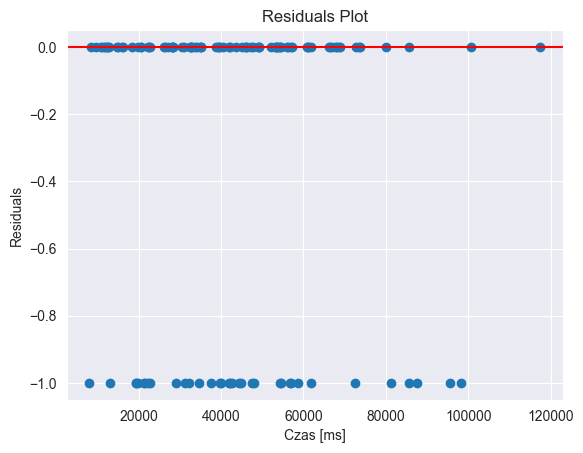

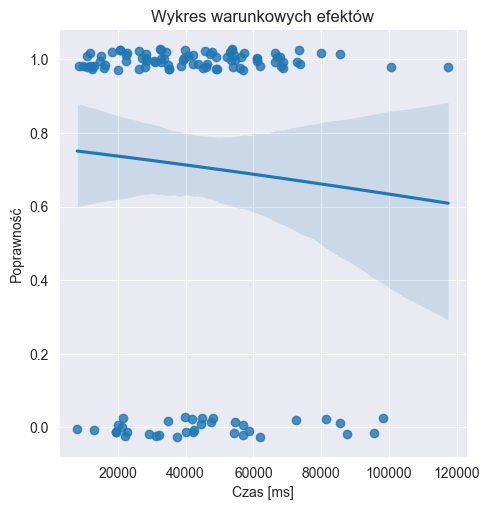

In [16]:
create_plots(df)

#### Zsumowane grafiki B

Optimization terminated successfully.
         Current function value: 0.554986
         Iterations 5
SUM_B:
p-value: 0.5541975814569773
Brak podstaw do odrzucenia H0.
                           Logit Regression Results                           
Dep. Variable:              SumCorr_b   No. Observations:                   40
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                 -0.2272
Time:                        22:23:50   Log-Likelihood:                -22.199
converged:                       True   LL-Null:                       -18.089
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.2902      0.990      0.29

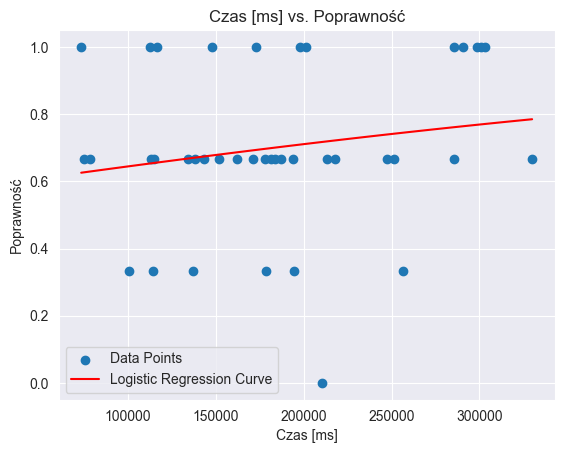

In [17]:
df_merge['intercept'] = np.ones(len(df_merge))
conduct_logistic_regression_test(df_merge, 'SumCorr_b', ['intercept', 'Sum_b'], ALPHA)
create_scatter_logit_plot(df_merge, 'Sum_b', 'SumCorr_b', 'Czas [ms]', 'Poprawność')

#### Grafiki B - zagregowane do jednej kolumny

In [18]:
popr = []
for col in df_merge.columns.tolist():
    if col.endswith('b_corr'):
        popr.append(df_merge[col])

czas = []
for col in df_merge.columns.tolist():
    if col.startswith('Duration') and col.endswith('b'):
        czas.append(df_merge[col])

czas_row = prepare_row(czas)
popr_row = prepare_row(popr)

df = pd.DataFrame({'poprawnosc': popr_row, 'czas': czas_row, 'intercept': np.ones(len(czas_row))})

conduct_logistic_regression_test(df, 'poprawnosc', ['intercept', 'czas'], ALPHA)

Optimization terminated successfully.
         Current function value: 0.607814
         Iterations 5
CZAS:
p-value: 0.3909388844537306
Brak podstaw do odrzucenia H0.
                           Logit Regression Results                           
Dep. Variable:             poprawnosc   No. Observations:                  120
Model:                          Logit   Df Residuals:                      118
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                0.004993
Time:                        22:23:51   Log-Likelihood:                -72.938
converged:                       True   LL-Null:                       -73.304
Covariance Type:            nonrobust   LLR p-value:                    0.3922
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.1760      0.438      2.687

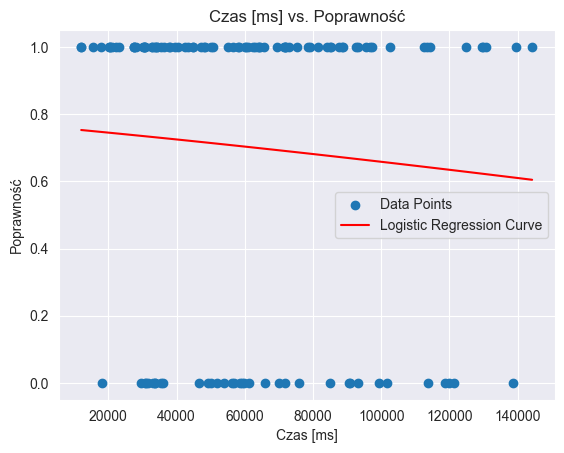

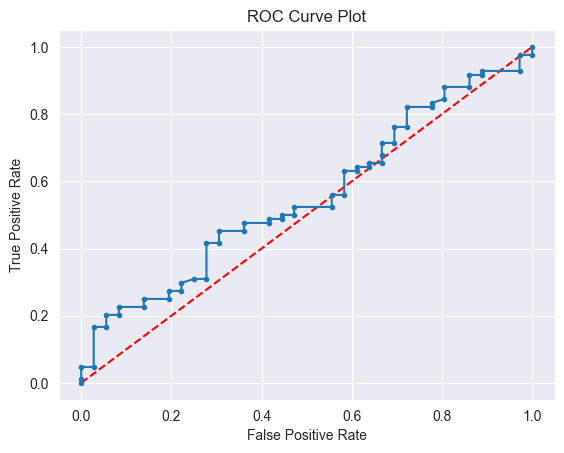

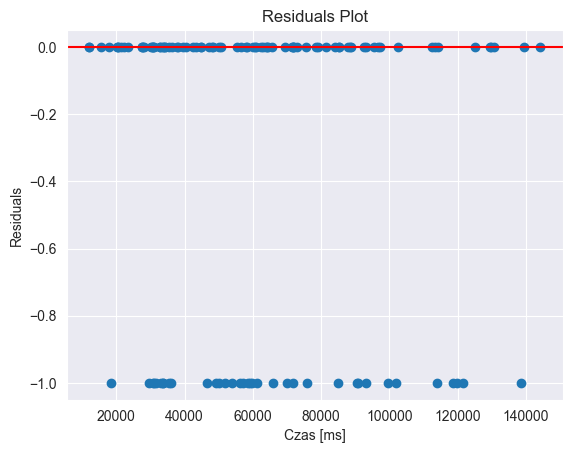

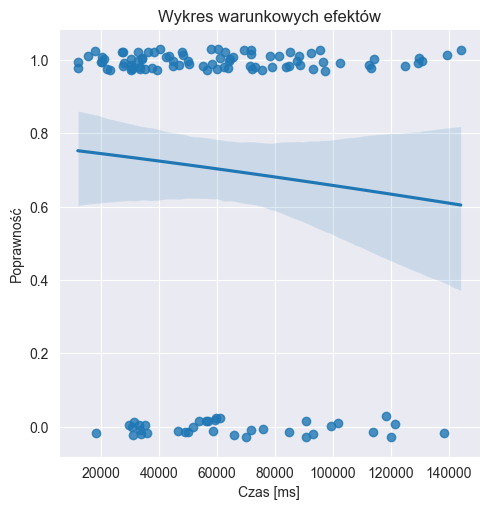

In [19]:
create_plots(df)

#### Zsumowane grafiki 1,2,3

Optimization terminated successfully.
         Current function value: 0.273371
         Iterations 6
SUM_1:
p-value: 0.9267717670622181
Brak podstaw do odrzucenia H0.
                           Logit Regression Results                           
Dep. Variable:              SumCorr_1   No. Observations:                   40
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                -0.04174
Time:                        22:23:52   Log-Likelihood:                -10.935
converged:                       True   LL-Null:                       -10.497
Covariance Type:            nonrobust   LLR p-value:                     1.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.3642      1.902      1.24

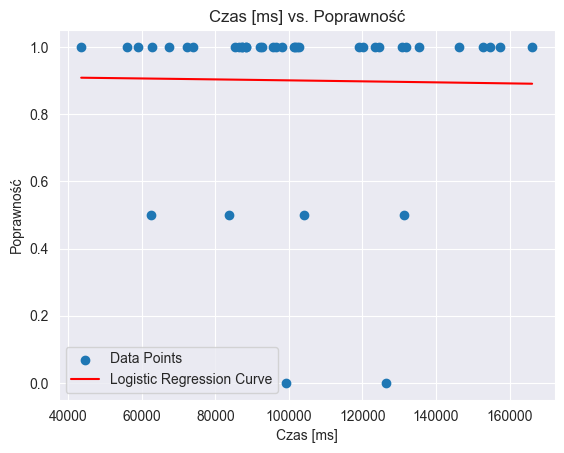

In [20]:
df_merge['intercept'] = np.ones(len(df_merge))
conduct_logistic_regression_test(df_merge, 'SumCorr_1', ['intercept', 'Sum_1'], ALPHA)
create_scatter_logit_plot(df_merge, 'Sum_1', 'SumCorr_1', 'Czas [ms]', 'Poprawność')

Optimization terminated successfully.
         Current function value: 0.467694
         Iterations 6
SUM_2:
p-value: 0.009948317649912733
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
                           Logit Regression Results                           
Dep. Variable:              SumCorr_2   No. Observations:                   40
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                  0.1912
Time:                        22:23:58   Log-Likelihood:                -18.708
converged:                       True   LL-Null:                       -23.129
Covariance Type:            nonrobust   LLR p-value:                  0.002942
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept 

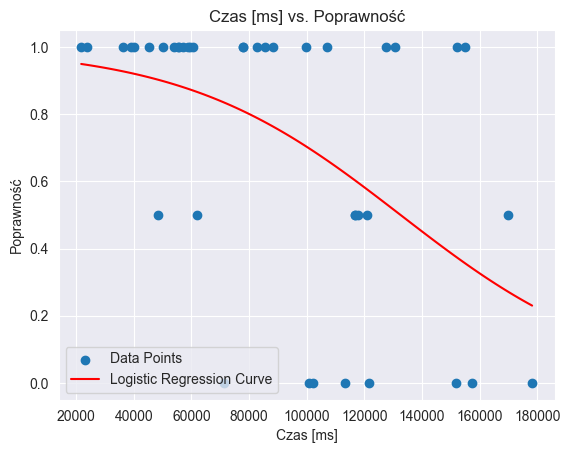

In [22]:
df_merge['intercept'] = np.ones(len(df_merge))
conduct_logistic_regression_test(df_merge, 'SumCorr_2', ['intercept', 'Sum_2'], ALPHA)
create_scatter_logit_plot(df_merge, 'Sum_2', 'SumCorr_2', 'Czas [ms]', 'Poprawność')

Optimization terminated successfully.
         Current function value: 0.622377
         Iterations 5
SUM_3:
p-value: 0.06469087296899584
Brak podstaw do odrzucenia H0.
                           Logit Regression Results                           
Dep. Variable:              SumCorr_3   No. Observations:                   40
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                  0.1021
Time:                        22:24:11   Log-Likelihood:                -24.895
converged:                       True   LL-Null:                       -27.726
Covariance Type:            nonrobust   LLR p-value:                   0.01734
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.5582      0.902     -1.7

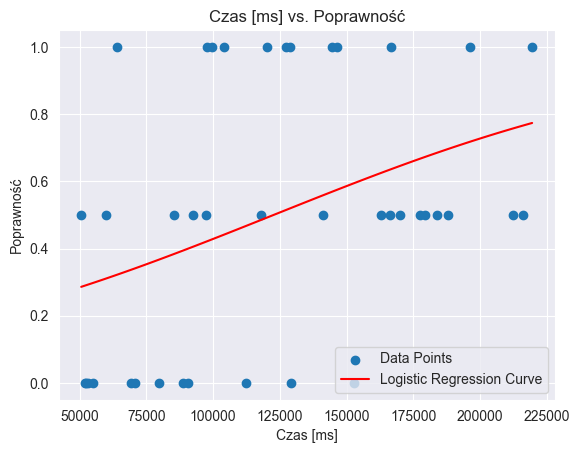

In [23]:
df_merge['intercept'] = np.ones(len(df_merge))
conduct_logistic_regression_test(df_merge, 'SumCorr_3', ['intercept', 'Sum_3'], ALPHA)
create_scatter_logit_plot(df_merge, 'Sum_3', 'SumCorr_3', 'Czas [ms]', 'Poprawność')

#### Grafiki 1,2,3 - zagregowane do jednej kolumny per grupa

-> 1

In [24]:
popr = []
for col in df_merge.columns.tolist():
    if col.startswith('1') and col.endswith('_corr'):
        popr.append(df_merge[col])

czas = []
for col in df_merge.columns.tolist():
    if col.startswith('Duration_1'):
        czas.append(df_merge[col])

czas_row = prepare_row(czas)
popr_row = prepare_row(popr)

df = pd.DataFrame({'poprawnosc': popr_row, 'czas': czas_row, 'intercept': np.ones(len(czas_row))})

conduct_logistic_regression_test(df, 'poprawnosc', ['intercept', 'czas'], ALPHA)

Optimization terminated successfully.
         Current function value: 0.321967
         Iterations 7
CZAS:
p-value: 0.495992729476448
Brak podstaw do odrzucenia H0.
                           Logit Regression Results                           
Dep. Variable:             poprawnosc   No. Observations:                   80
Model:                          Logit   Df Residuals:                       78
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                0.009586
Time:                        22:24:17   Log-Likelihood:                -25.757
converged:                       True   LL-Null:                       -26.007
Covariance Type:            nonrobust   LLR p-value:                    0.4801
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.5546      0.977      1.592 

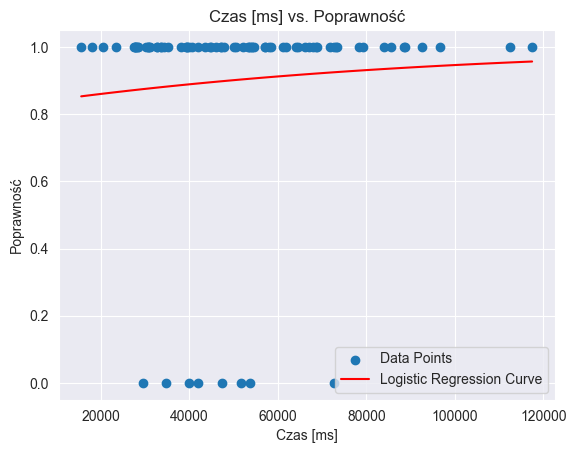

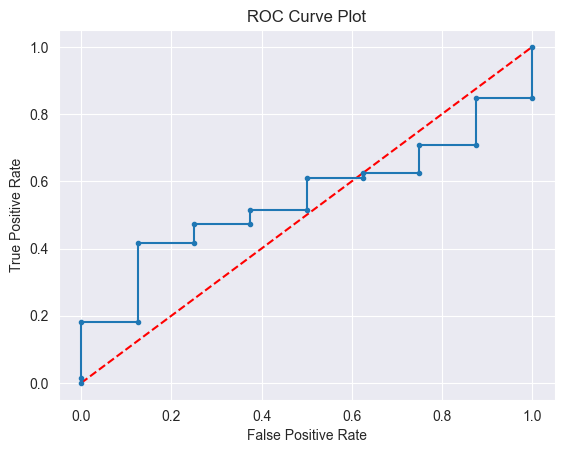

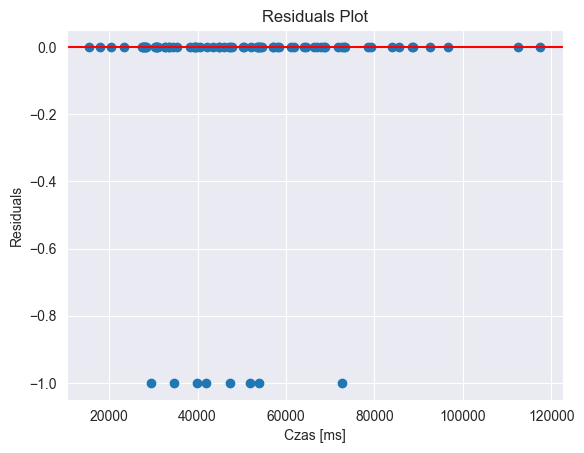

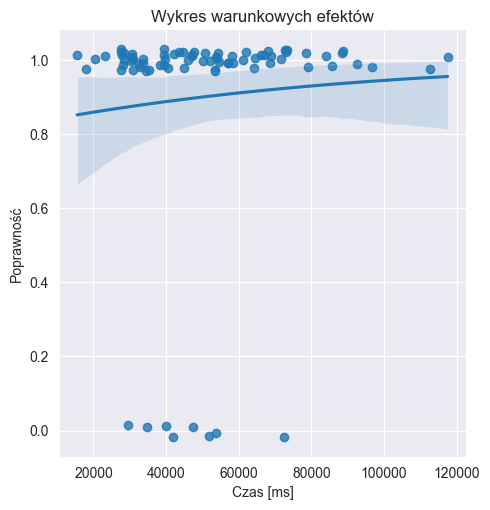

In [25]:
create_plots(df)

-> 2

In [26]:
popr = []
for col in df_merge.columns.tolist():
    if col.startswith('2') and col.endswith('_corr'):
        popr.append(df_merge[col])

czas = []
for col in df_merge.columns.tolist():
    if col.startswith('Duration_2'):
        czas.append(df_merge[col])

czas_row = prepare_row(czas)
popr_row = prepare_row(popr)

df = pd.DataFrame({'poprawnosc': popr_row, 'czas': czas_row, 'intercept': np.ones(len(czas_row))})

conduct_logistic_regression_test(df, 'poprawnosc', ['intercept', 'czas'], ALPHA)

Optimization terminated successfully.
         Current function value: 0.529689
         Iterations 6
CZAS:
p-value: 0.0018127792601140321
Istnieją podstawy do odrzucenia H0, przyjmujemy hipotezę H1.
                           Logit Regression Results                           
Dep. Variable:             poprawnosc   No. Observations:                   80
Model:                          Logit   Df Residuals:                       78
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                  0.1170
Time:                        22:24:21   Log-Likelihood:                -42.375
converged:                       True   LL-Null:                       -47.992
Covariance Type:            nonrobust   LLR p-value:                 0.0008033
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept 

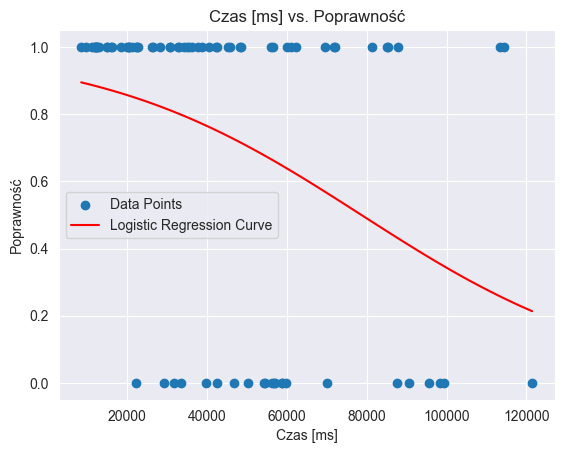

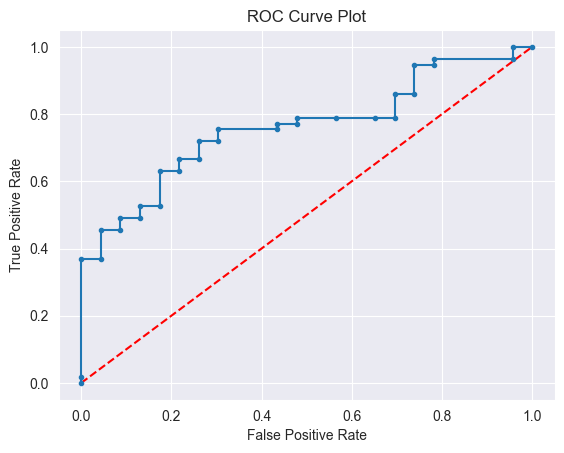

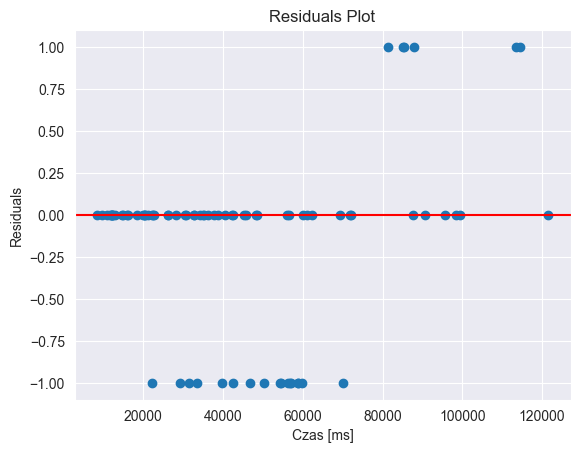

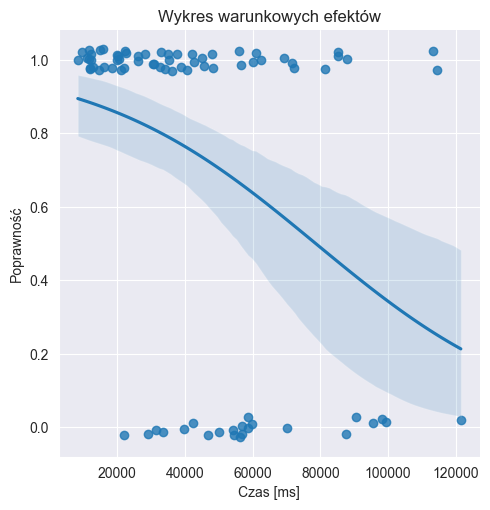

In [27]:
create_plots(df)

-> 3

In [28]:
popr = []
for col in df_merge.columns.tolist():
    if col.startswith('3') and col.endswith('_corr'):
        popr.append(df_merge[col])

czas = []
for col in df_merge.columns.tolist():
    if col.startswith('Duration_3'):
        czas.append(df_merge[col])

czas_row = prepare_row(czas)
popr_row = prepare_row(popr)

df = pd.DataFrame({'poprawnosc': popr_row, 'czas': czas_row, 'intercept': np.ones(len(czas_row))})

conduct_logistic_regression_test(df, 'poprawnosc', ['intercept', 'czas'], ALPHA)

Optimization terminated successfully.
         Current function value: 0.671444
         Iterations 4
CZAS:
p-value: 0.07008699497487991
Brak podstaw do odrzucenia H0.
                           Logit Regression Results                           
Dep. Variable:             poprawnosc   No. Observations:                   80
Model:                          Logit   Df Residuals:                       78
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                 0.03131
Time:                        22:24:29   Log-Likelihood:                -53.716
converged:                       True   LL-Null:                       -55.452
Covariance Type:            nonrobust   LLR p-value:                   0.06240
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -0.7545      0.471     -1.60

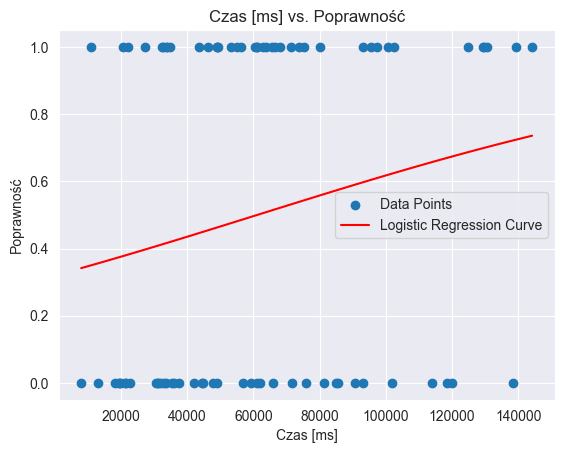

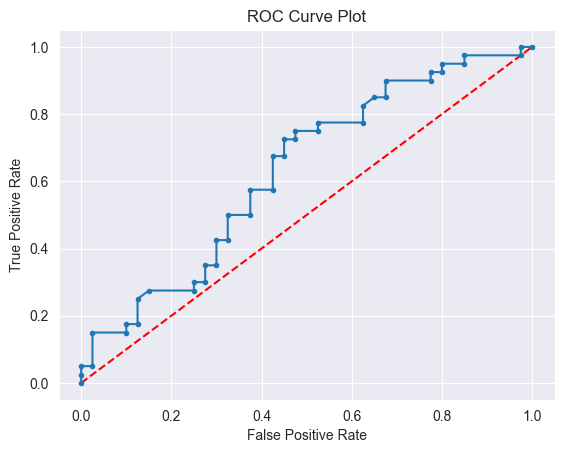

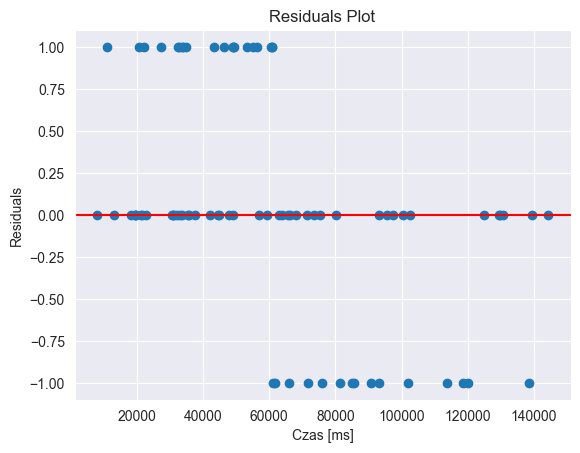

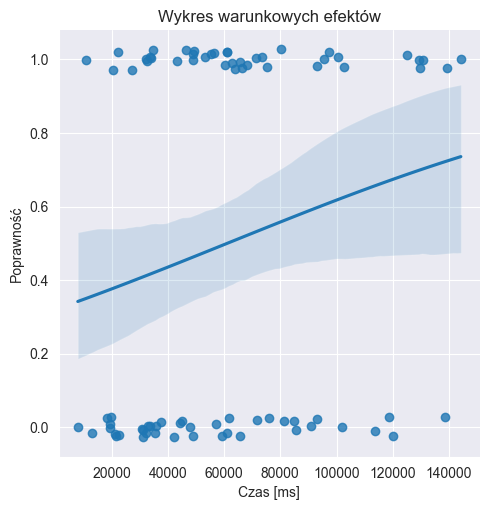

In [29]:
create_plots(df)

#### Zadania 1a, 1b, 2a, 2b, 3a, 3b

In [30]:
df1a = pd.DataFrame({'czas': df_merge['Duration_1a'], 'poprawnosc': df_merge['1a_corr'], 'intercept': np.ones(40).astype(int)})
df2a = pd.DataFrame({'czas': df_merge['Duration_2a'], 'poprawnosc': df_merge['2a_corr'], 'intercept': np.ones(40).astype(int)})
df3a = pd.DataFrame({'czas': df_merge['Duration_3a'], 'poprawnosc': df_merge['3a_corr'], 'intercept': np.ones(40).astype(int)})

df1b = pd.DataFrame({'czas': df_merge['Duration_1b'], 'poprawnosc': df_merge['1b_corr'], 'intercept': np.ones(40).astype(int)})
df2b = pd.DataFrame({'czas': df_merge['Duration_2b'], 'poprawnosc': df_merge['2b_corr'], 'intercept': np.ones(40).astype(int)})
df3b = pd.DataFrame({'czas': df_merge['Duration_3b'], 'poprawnosc': df_merge['3b_corr'], 'intercept': np.ones(40).astype(int)})

dfs = [df1a, df1b, df2a, df2b, df3a, df3b]
names = {
    1: '1a:',
    2: '1b:',
    3: '2a:',
    4: '2b:',
    5: '3a:',
    6: '3b:',
}

In [31]:
for i, df in enumerate(dfs):
    print('-------------------------------------')
    print(names[i+1])
    conduct_logistic_regression_test(df, 'poprawnosc', ['intercept', 'czas'], ALPHA)

-------------------------------------
1a:
Optimization terminated successfully.
         Current function value: 0.370280
         Iterations 6
CZAS:
p-value: 0.4960341084430627
Brak podstaw do odrzucenia H0.
                           Logit Regression Results                           
Dep. Variable:             poprawnosc   No. Observations:                   40
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            1
Date:                Fri, 20 Oct 2023   Pseudo R-squ.:                 0.01723
Time:                        22:24:38   Log-Likelihood:                -14.811
converged:                       True   LL-Null:                       -15.071
Covariance Type:            nonrobust   LLR p-value:                    0.4712
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
i

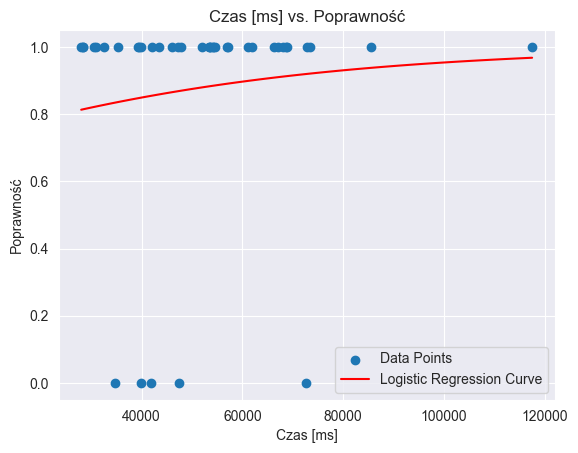

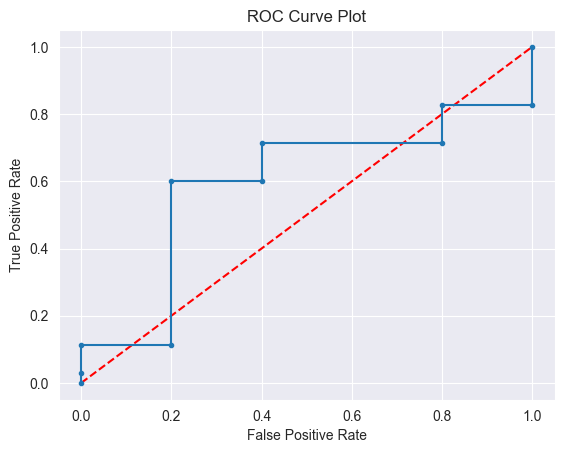

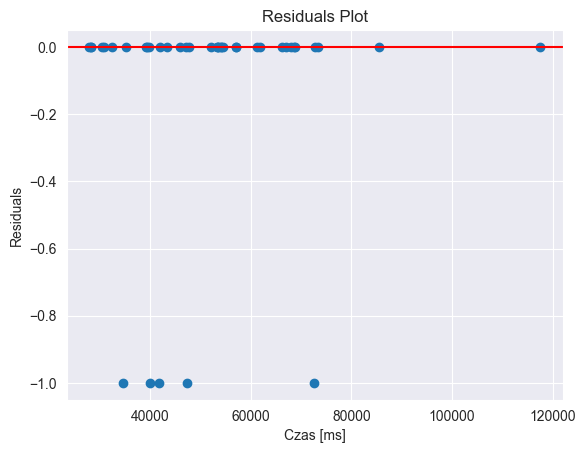

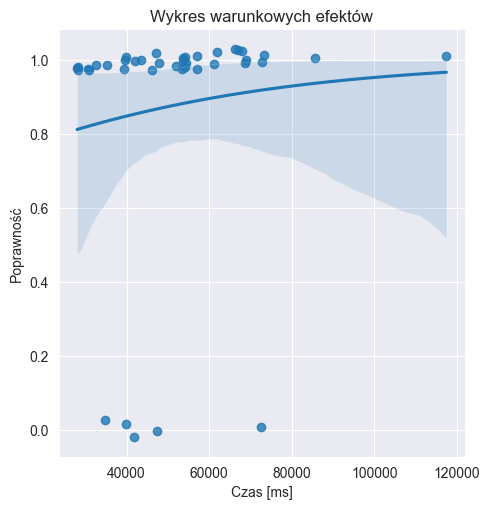

In [32]:
create_plots(df1a)

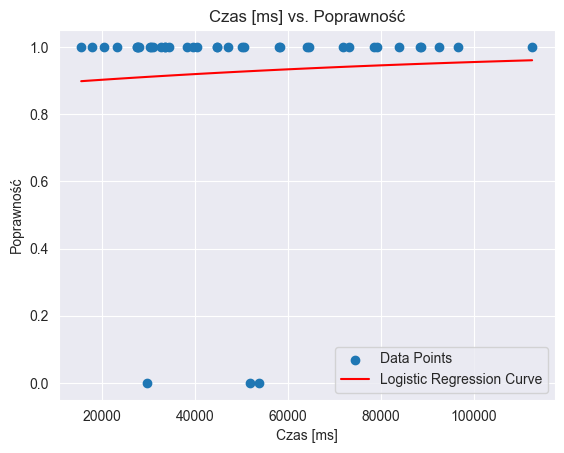

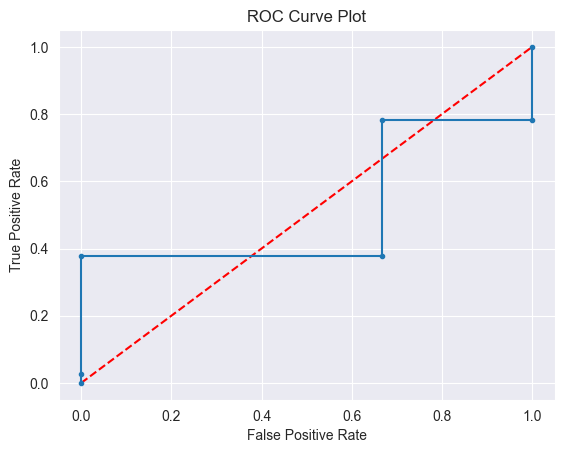

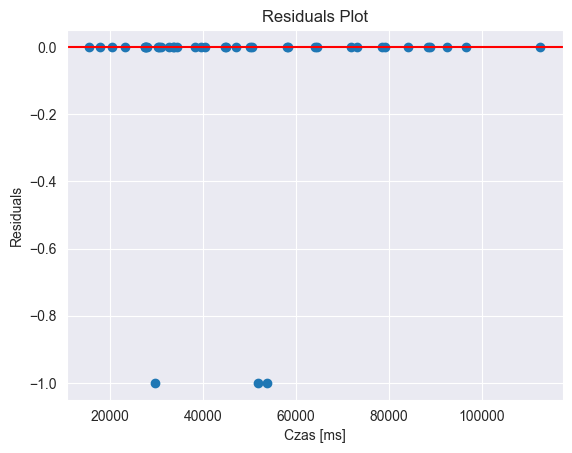

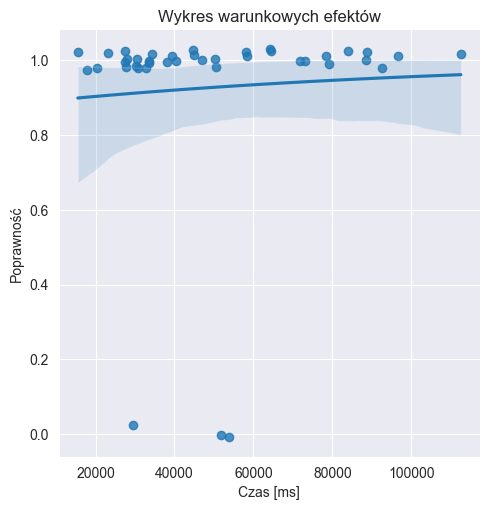

In [33]:
create_plots(df1b)

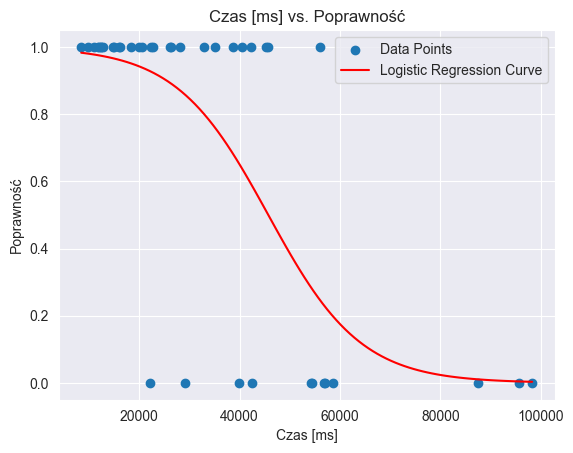

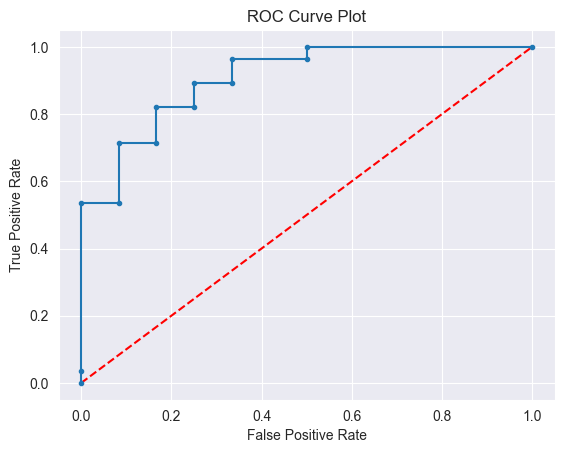

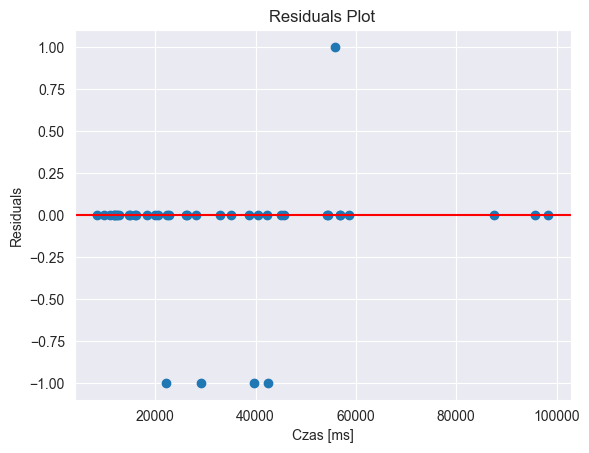

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)
/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:198: RuntimeWarning: overflow encountered in exp
  t = np.exp(-z)


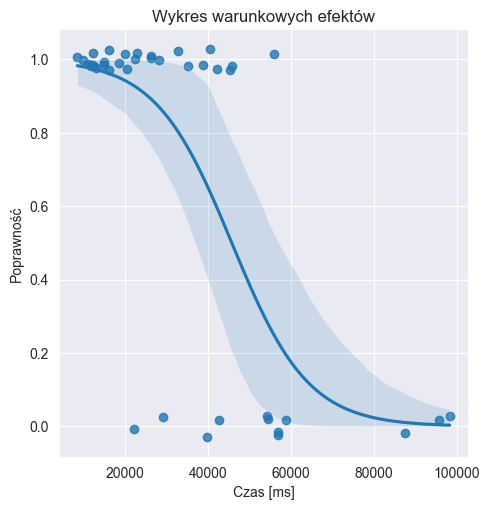

In [34]:
create_plots(df2a)

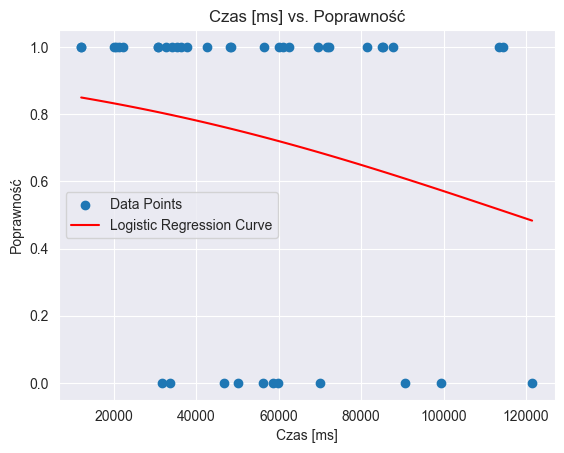

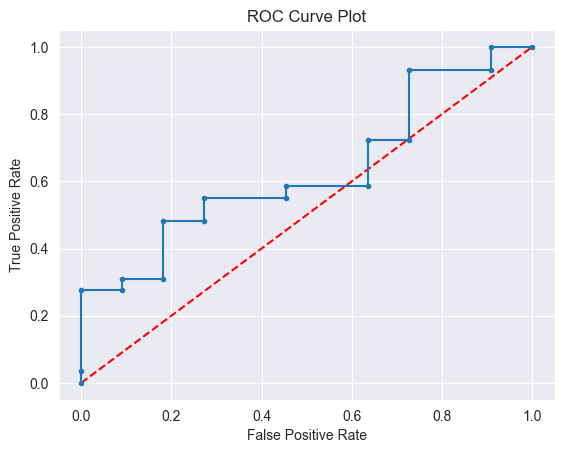

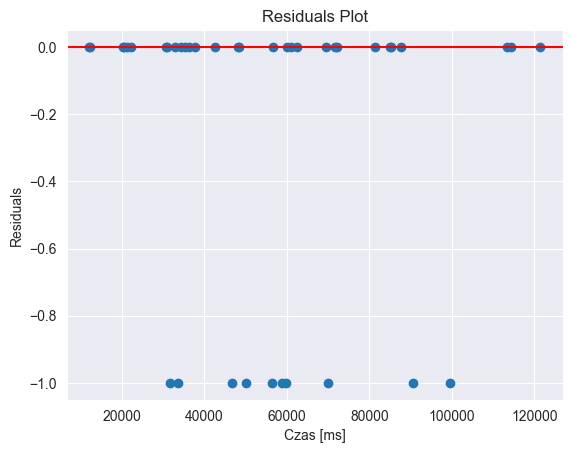

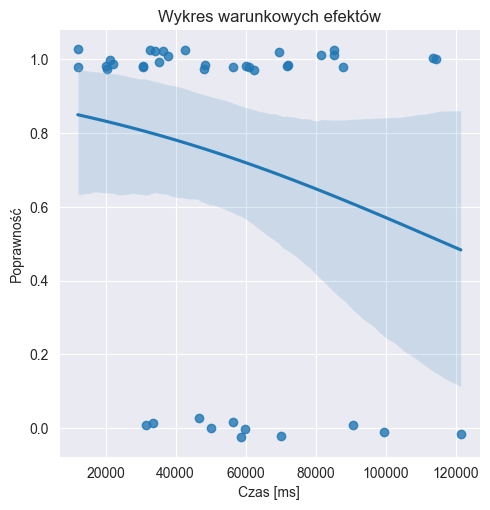

In [35]:
create_plots(df2b)

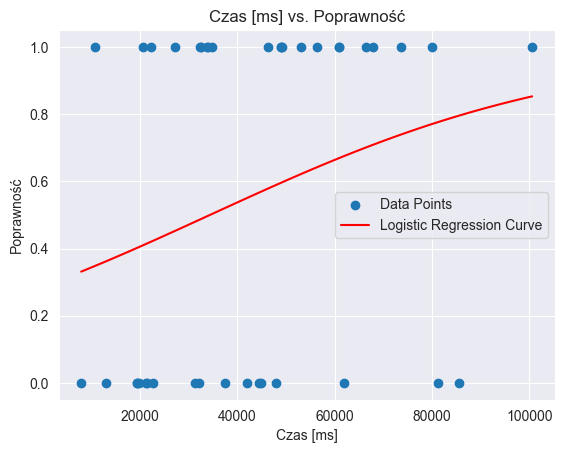

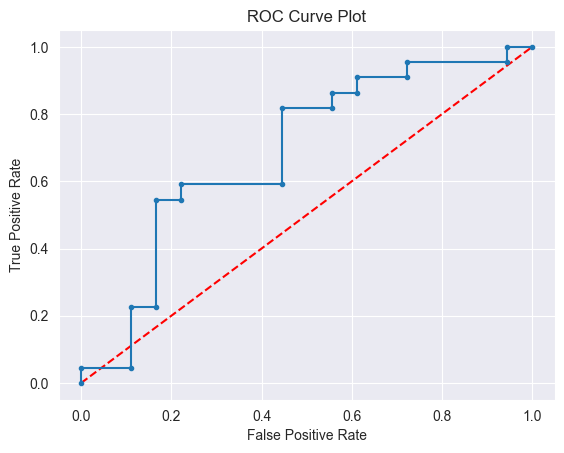

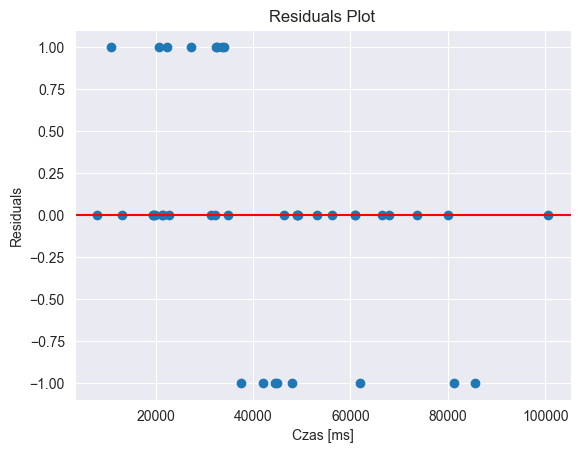

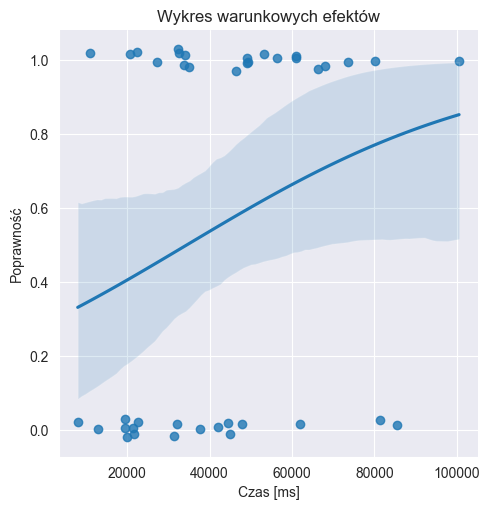

In [36]:
create_plots(df3a)

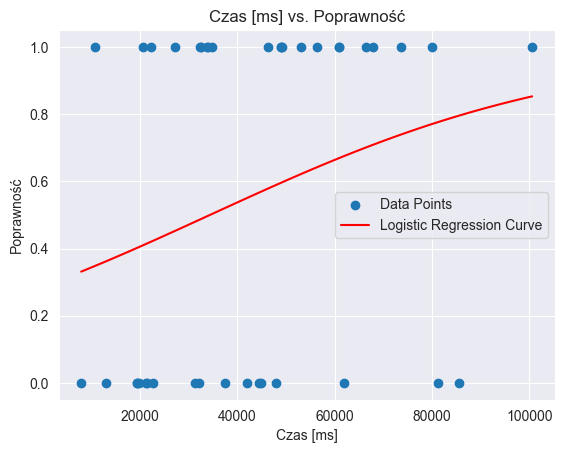

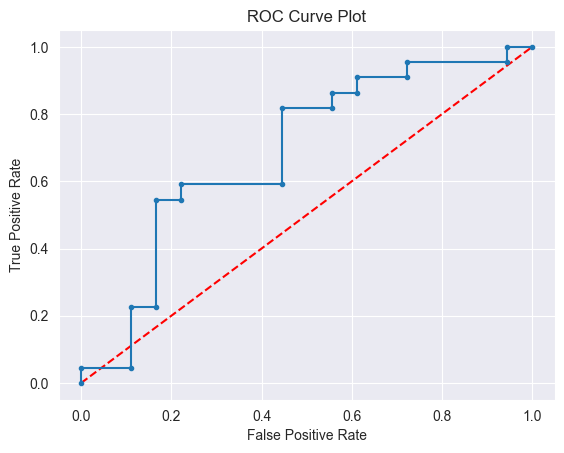

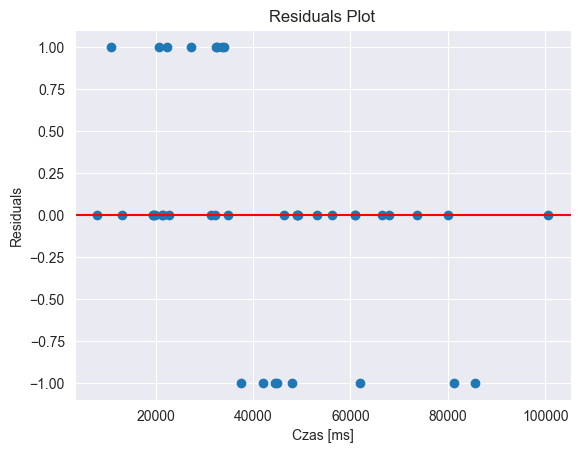

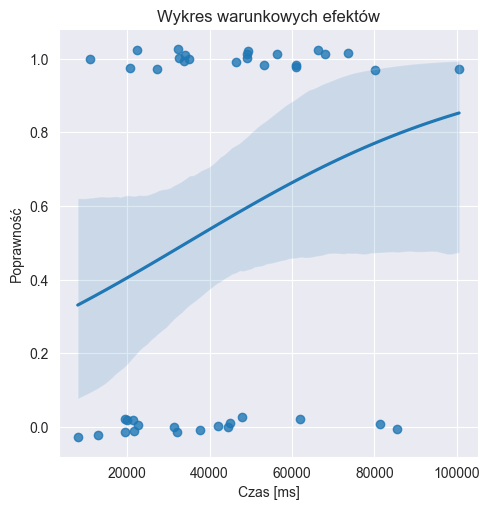

In [37]:
create_plots(df3a)

### Podsumowanie:
Istnieje istotna statystycznie zależność między poprawnością odpowiedzi a czasem odpowiedzi na poziomie istotności $\alpha=0.05$ dla:

- zsumowane grafiki 2 (wraz ze wzrostem czasu spadało prawodpodobieństwo udzielenia poprawnej odpowiedzi)
- grafik 2 (wraz ze wzrostem czasu spadało prawodpodobieństwo udzielenia poprawnej odpowiedzi)
- grafiki 2a (wraz ze wzrostem czasu spadało prawodpodobieństwo udzielenia poprawnej odpowiedzi)
- grafiki 3b (wraz ze wzrostem czasu wzrastało prawodpodobieństwo udzielenia poprawnej odpowiedzi)

Potwierdzenie obserwacji: grafiki 2 były proste i niektórzy uczestnicy doszukiwali się 'haczyka', a grafiki 3 były trudne i im dłużej uczestnik zastanawiał się na tym pytaniem, tym była większa szansa, że poprawnie zrozumie polecenie